# ESPN SCRAP EXAMPLE:
- Generate a list of urls by date to scrap
- Extract the link of each game to obtain information of the games each day 
- Extract relevant features of each game link 
- Pass all data to a dataframe and then export to a csv file

1.- Obtain link for boxscore button of each game

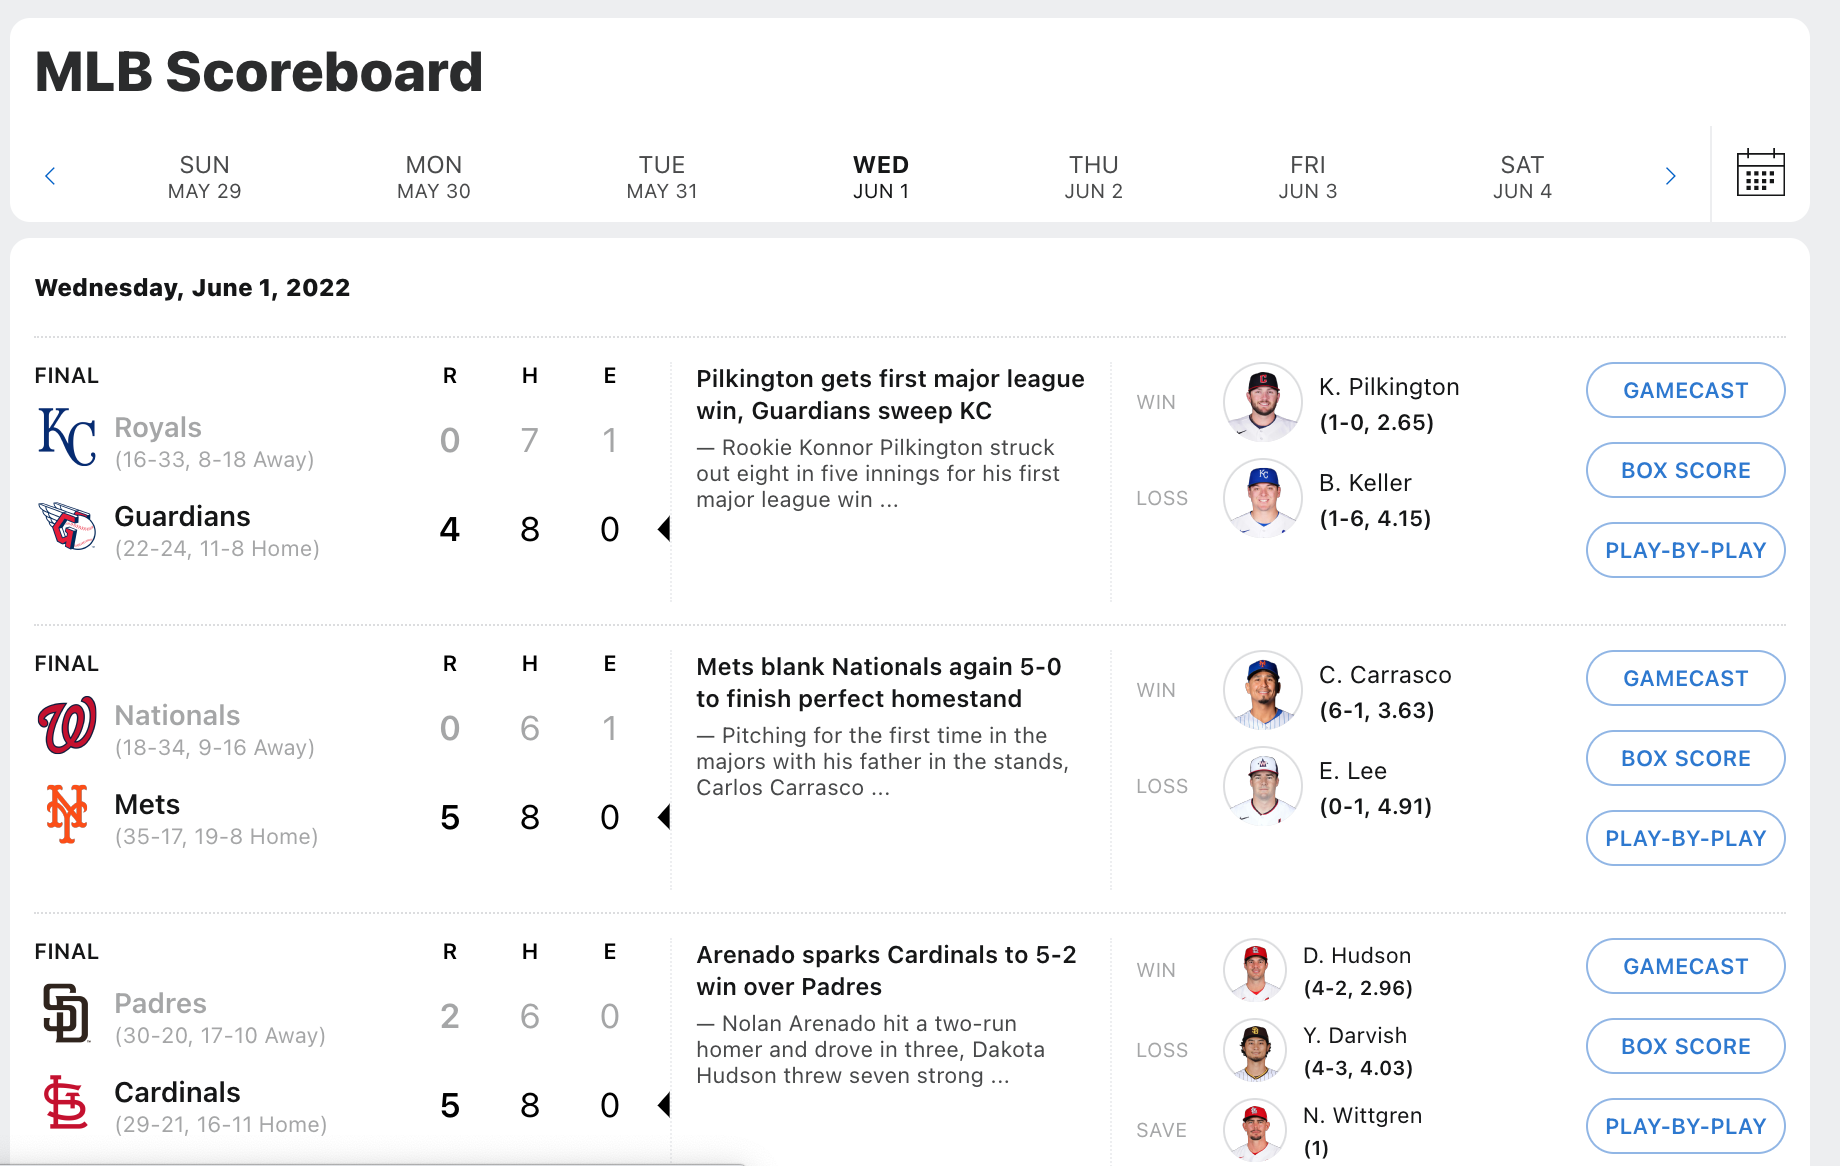

2.- Extract features from each boxscore each day
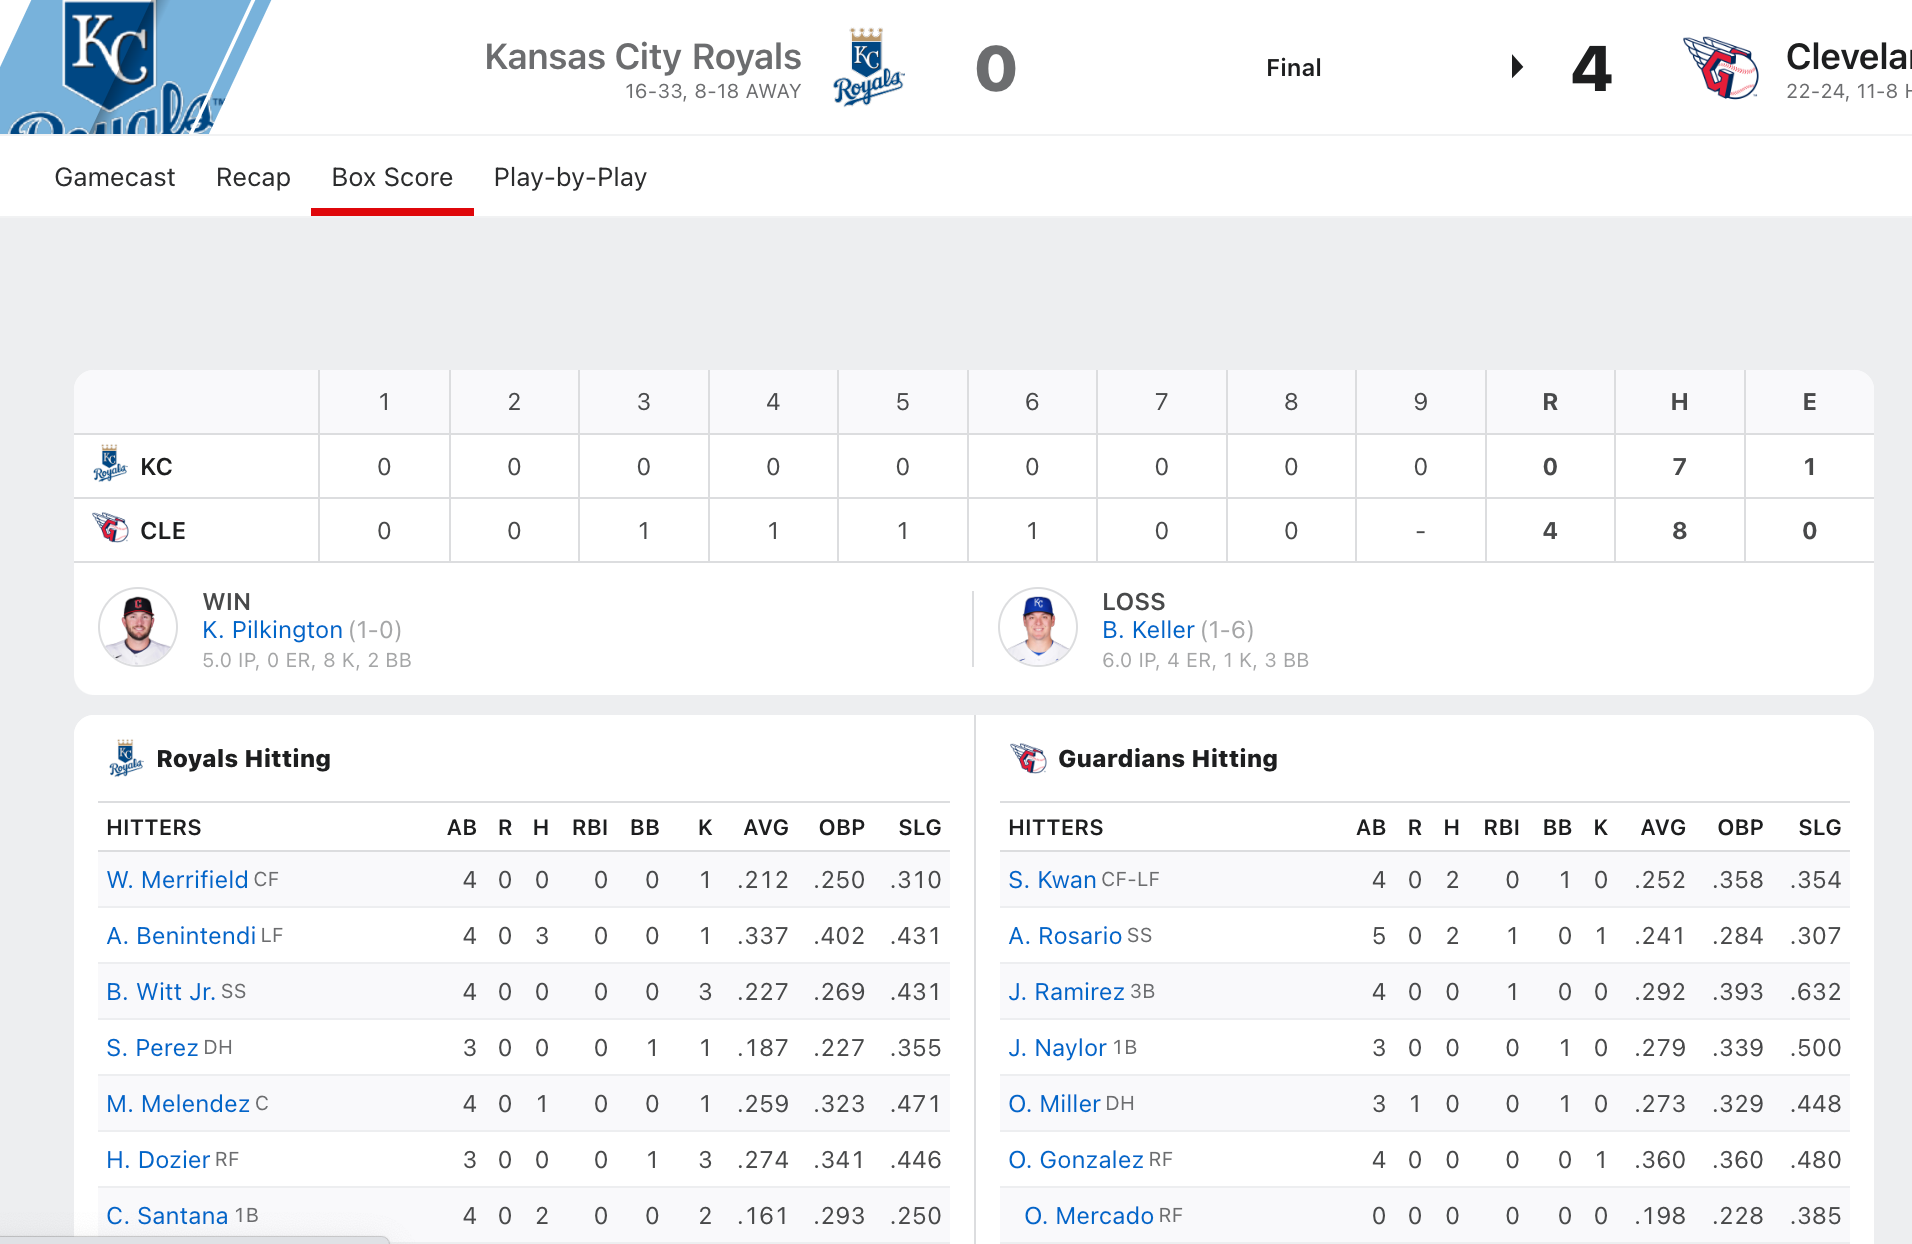

# Initial Setup

In [1]:
#Importing some libraries
import pandas as pd
import requests
import sys
sys.path.append("/Users/kike/opt/anaconda3/lib/python3.9/site-packages/")
import bs4
pd.pandas.set_option ("display.max_columns", None)
import ssl
import math 
import time
import random
import re
# generate random integer values
from random import seed
from random import randint
# seed random number generator
seed(1)


#Importing a csv format with the names of columns of features i will scrap (you can then change this file to the generated one at the end to make a recursive accumulator) dataset9
dfacum = pd.read_csv("format.csv",index_col = None)


dfacum

,0,Fecha,Local,Visit,Local Score,Visit Score,Local i5,Visit i5,Local Hits,Visit Hits,Local pitcher,Local pitcher in,Local pitcher ERA,Local pitcher Hit ERA,Local pitcher K ERA,Local pitcher BB ERA,Visit pitcher,Visit pitcher in,Visit pitcher ERA,Visit pitcher Hit ERA,Visit pitcher K ERA,Visit pitcher BB ERA


# Delimiting date range to scrap 

In [2]:

# The base url to append date (you can change year if you want previous years)
a = "https://www.espn.com/mlb/scoreboard/_/date/2022"
#Declaring empty list
days=[]
months=[]

#Declaring day number range 
for i in range (1,3,1):
    #We use zfill to give the format the url of the site uses for day and month 01,02 etc..
    days.append(str(i).zfill(2))

#Declaring month number range
for i in range (6,8,1):
    months.append(str(i).zfill(2))
    
#Creating date container
fechas=[]   

# Appending string plus day month and day number in a double cycle
for k in months:
    for i,n in enumerate(days):
        fechas.append(a + k + days[i])

#showing target days to scrap
fechas

['https://www.espn.com/mlb/scoreboard/_/date/20220601',
 'https://www.espn.com/mlb/scoreboard/_/date/20220602',
 'https://www.espn.com/mlb/scoreboard/_/date/20220701',
 'https://www.espn.com/mlb/scoreboard/_/date/20220702']

# Defining game links scraping function

In [3]:

def scrap(ref):
    #getting all html text
    html_texto = requests.get(ref).text
    
    #creating. beautiful soup instance
    soup = bs4.BeautifulSoup(html_texto, "lxml")
    
    #grabbing table with the target class
    table_rows= soup.find_all("a", class_= "AnchorLink Button Button--sm Button--anchorLink Button--alt mb4 w-100 mr2" )
    
    #converting resulting finds to pure string format
    table_rows2= str(table_rows)
    
    #Grabbing lxml in soup
    soup2 = bs4.BeautifulSoup(table_rows2, "lxml")
    
    #Creating a cointainer for links
    l3=[]
    
    #Extraxt all links termination from tables in the url                         
    for link in soup2("a" , href= True):
        
        l3.append(link["href"])
    #Just keep links with the desired format  (boxscore button link format)                        
    links = [x for x in l3 if "/mlb/boxscore" in x]
    
    
    # Base form of the link                        
    li = "https://www.espn.com"
    #linkst= links + li
    
    #Saving the number of links to a variable
    le= (len(links))
    
    #Creating a container with tht number of rows same to the number of links collected                         
    linkz=[]
    t= int(le) 
    for i in range(0, t, 1):
        linkz.append(i)
    
    # Pasting base url + each link extracted in the date
    for c in range(le):
        linkz[c] = li + links[c]
    
    #return generated links for that day
    return (linkz)




# Defining game boxscore scrap function

In [4]:
#function will get feed wih scrapped links
def marcador(ref):
    
    #Create context to scrap tables
    ssl.create_default_https_context = ssl._create_unverified_context
    
    #link to scrap
    url_link = ref
    
    #make request as a browser
    r = requests.get(url_link,headers ={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})
    scraper = pd.read_html(r.text)
    
    

    #Defining each table
    
    #Game score table
    scores =   scraper[0]
    
    #Select pitcher data table
    scra=[]
    for x in scraper:
        if "Pitchers" in x.columns:
            scra.append(x)
        else:
            pass
    
    
    
    #Select visit pitcher column
    v_pitch =  scra[0] 
    l_pitch=  scra[1] 
    
    #return the 3 tables extracted
    return (scores,v_pitch,l_pitch)

# Creating dataframe with scraped data

In [5]:
#Initiating date cycle
for x,i in enumerate(fechas):
    
    #print day selected
    print("dia: ", i)
    dialink= i

    #"------------------------------------"
    # obtain boxscore link for game
    links = scrap(dialink)
    
    #Declaring a df with all the day game links
    table = pd.DataFrame(links)



    #Selecting each game link to scrap
    for n in range (len(links)):
        #Waiting a random time to avoid abnormal activity detection
        rand = randint(0, 3)
        time.sleep(rand)
        
        #Printing which game is the one scraped
        print("Link:" , n,  "de: ", len(links))
        
        #Getting sure the link we obtained has the correct format
        if "https://www.espn.com/mlb/boxscore" in links[n]:
           








            
            
            #Scraping each link data and sending it to the container df (using try to avoid program stop if one link page is not available)
            try:
                #obtaining game boxscore
                mar = marcador(links[n])[0]
                
                #obtaining visit team pitcher data
                v_pitch = marcador(links[n])[1]
                #obtaining local team pitcher data
                l_pitch = marcador(links[n])[2]
                
                
                #Adding data to the container df
                table.loc[n,"Date"]= fechas[x][-8:]

                table.loc[n,"Local"] = mar.iloc[1,0]
                print( table.loc[n,"Local"])
                table.loc[n,"Visit"] = mar.iloc[0,0]
                table.loc[n,"Local Score"]= mar.iloc[1,-3]
                table.loc[n,"Visit Score"]= mar.iloc[0,-3]
                table.loc[n,"Local i5"]= sum(mar.iloc[1,1:6])
                table.loc[n,"Visit i5"]= sum(mar.iloc[0,1:6])
                table.loc[n,"Local Hits"]= mar.iloc[1,-2]
                table.loc[n,"Visit Hits"]= mar.iloc[0,-2]

                table.loc[n,"Local pitcher"]= l_pitch.iloc[0,0]
                table.loc[n,"Local pitcher"]= re.sub(r"\([^()]*\)", "", table.loc[n,"Local pitcher"])


                table.loc[n,"Local pitcher in"]= (l_pitch.iloc[0,1])
                table.loc[n,"Local pitcher ERA"]= l_pitch.iloc[0,3]  
                table.loc[n,"Local pitcher Hit ERA"]= l_pitch.iloc[0,2]  
                table.loc[n,"Local pitcher K ERA"]= l_pitch.iloc[0,6]  
                table.loc[n,"Local pitcher BB ERA"]= l_pitch.iloc[0,5] 

                table.loc[n,"Visit pitcher"]= v_pitch.iloc[0,0]
                table.loc[n,"Visit pitcher"]= re.sub(r"\([^()]*\)", "", table.loc[n,"Visit pitcher"])
                table.loc[n,"Visit pitcher in"]= (v_pitch.iloc[0,1])
                table.loc[n,"Visit pitcher ERA"]= v_pitch.iloc[0,3]  
                table.loc[n,"Visit pitcher Hit ERA"]= v_pitch.iloc[0,2]  
                table.loc[n,"Visit pitcher K ERA"]= v_pitch.iloc[0,6]  
                table.loc[n,"Visit pitcher BB ERA"]= v_pitch.iloc[0,5] 
            except Exception as e:
                print("skipping url do to an exception",e)
            
    else:
        pass
    
    # generating a copy of the data extracted
    data = table.copy()
    
    #Empty container
    dra =[] 
    
    #Selecting initial string feautures
    datase = ["Date", "Local", "Visit", "Local pitcher", "Visit pitcher", 0]
    
    #Selecting all the other columns that should be not strings
    datas = [x for x in data.columns if x not in datase]
    print(datas)
    
    
    #converting all columns that should be float to float
    for feature in datas:
        for i in range (len(data)):
            
            #If some string is contained by hand error in a game, this will prevent error
            try: 

                data.loc[i, feature] = float(data.loc[i, feature])



            
            except Exception as e:
                print("skipping url do to an exception",e, "Dropping row: ", i)
                #getting the columns that are not ok
                dra.append(i)

    #dropping damaged rows   
    dra = set(dra)
    dra = list(dra)
    data.drop(dra, axis=0, inplace=True)
    
   
    

    #Adding data extracted from this day to the accumulator containes
    
    frames = [dfacum, data]
    dfacum = pd.concat(frames)
        
       

        





     





#Dropping a 0 (index) column if it appears
try:
    dfacum.drop(0,axis = 1,inplace = True)
except Exception as e:
    pass

try:
    dfacum.drop("0",axis = 1,inplace = True)
except Exception as e:
    pass


#Getting just the first word of the local team to avoid bugs with the spaces in the words
dfacum["Local"] =  list(map(lambda n: n.split()[0], dfacum["Local"]))
    
#Getting just the first word of the visit team to avoid bugs with the spaces in the words
dfacum["Visit"] =  list(map(lambda n: n.split()[0], dfacum["Visit"]))


#Adding a column to specify if the local team won the game; 1 for local team win, 0 for visit team win
dfacum.loc[dfacum["Visit Score"] < dfacum["Local Score"] ,  "Local Win?"] = 1
dfacum.loc[dfacum["Local Score"] < dfacum["Visit Score"] ,  "Local Win?"] = 0 

#Preventive index reset and drop
dfacum.reset_index(inplace=True)
dfacum.drop("index" ,axis=1, inplace=True)

#Showing the final df generated 
dfacum

dia:  https://www.espn.com/mlb/scoreboard/_/date/20220601
Link: 0 de:  15
Guardians  CLE
Link: 1 de:  15
Mets  NYM
Link: 2 de:  15
Cardinals  STL
Link: 3 de:  15
Rockies  COL
Link: 4 de:  15
Athletics  OAK
Link: 5 de:  15
Diamondbacks  ARI
Link: 6 de:  15
Phillies  PHI
Link: 7 de:  15
Rockies  COL
Link: 8 de:  15
Orioles  BAL
Link: 9 de:  15
Blue Jays  TOR
Link: 10 de:  15
Red Sox  BOS
Link: 11 de:  15
Tigers  DET
Link: 12 de:  15
Cubs  CHC
Link: 13 de:  15
Rangers  TEX
Link: 14 de:  15
Dodgers  LAD
['Local Score', 'Visit Score', 'Local i5', 'Visit i5', 'Local Hits', 'Visit Hits', 'Local pitcher in', 'Local pitcher ERA', 'Local pitcher Hit ERA', 'Local pitcher K ERA', 'Local pitcher BB ERA', 'Visit pitcher in', 'Visit pitcher ERA', 'Visit pitcher Hit ERA', 'Visit pitcher K ERA', 'Visit pitcher BB ERA']
dia:  https://www.espn.com/mlb/scoreboard/_/date/20220602
Link: 0 de:  12
Yankees  NYY
Link: 1 de:  12
Tigers  DET
Link: 2 de:  12
Rangers  TEX
Link: 3 de:  12
Blue Jays  TOR
Link: 4 de:

,Fecha,Local,Visit,Local Score,Visit Score,Local i5,Visit i5,Local Hits,Visit Hits,Local pitcher,Local pitcher in,Local pitcher ERA,Local pitcher Hit ERA,Local pitcher K ERA,Local pitcher BB ERA,Visit pitcher,Visit pitcher in,Visit pitcher ERA,Visit pitcher Hit ERA,Visit pitcher K ERA,Visit pitcher BB ERA,Date,Local Win?
0,NaN,Guardians,Royals,4.0,0.0,3.0,0.0,8.0,7.0,K. Pilkington,5.0,0.0,5.0,8.0,2.0,B. Keller,6.0,4.0,6.0,1.0,3.0,20220601,1.0
1,NaN,Mets,Nationals,5.0,0.0,2.0,0.0,8.0,6.0,C. Carrasco,5.0,0.0,4.0,5.0,5.0,E. Lee,3.2,2.0,4.0,2.0,3.0,20220601,1.0
2,NaN,Cardinals,Padres,5.0,2.0,1.0,1.0,8.0,6.0,D. Hudson,7.0,1.0,4.0,3.0,1.0,Y. Darvish,7.2,5.0,7.0,4.0,2.0,20220601,1.0
3,NaN,Rockies,Marlins,1.0,14.0,0.0,5.0,3.0,21.0,A. Senzatela,5.1,6.0,13.0,3.0,0.0,E. Cabrera,6.0,0.0,1.0,9.0,4.0,20220601,0.0
4,NaN,Athletics,Astros,4.0,5.0,0.0,1.0,4.0,11.0,C. Irvin,5.2,1.0,6.0,2.0,2.0,J. Verlander,7.0,3.0,2.0,6.0,2.0,20220601,0.0
5,NaN,Diamondbacks,Braves,0.0,6.0,0.0,2.0,3.0,12.0,M. Bumgarner,6.0,2.0,7.0,6.0,2.0,K. Wright,6.0,0.0,3.0,5.0,5.0,20220601,0.0
6,NaN,Phillies,Giants,6.0,5.0,2.0,0.0,10.0,5.0,A. Nola,6.0,5.0,5.0,5.0,0.0,C. Rodon,5.0,2.0,6.0,6.0,1.0,20220601,1.0
7,NaN,Rockies,Marlins,13.0,12.0,10.0,7.0,17.0,13.0,G. Marquez,5.0,7.0,7.0,5.0,3.0,T. Rogers,3.2,5.0,5.0,2.0,5.0,20220601,1.0
8,NaN,Orioles,Mariners,9.0,2.0,4.0,2.0,10.0,8.0,K. Bradish,4.2,2.0,6.0,6.0,2.0,R. Ray,5.0,4.0,6.0,6.0,3.0,20220601,1.0
9,NaN,Blue,White,7.0,3.0,5.0,3.0,10.0,9.0,H. Ryu,4.0,3.0,5.0,4.0,0.0,M. Kopech,3.0,5.0,6.0,4.0,4.0,20220601,1.0


In [6]:
#Adding a new column for the bullpen recieved total runs (bullpen runs allowed = total runs of the opposite team - starter pitcher allowed runs)
dfacum["L bullpen recieved"] = dfacum["Visit Score"] - dfacum["Local pitcher ERA"] 
dfacum["V bullpen recieved"] = dfacum["Local Score"] - dfacum["Visit pitcher ERA"]
dfacum.tail(50)

,Fecha,Local,Visit,Local Score,Visit Score,Local i5,Visit i5,Local Hits,Visit Hits,Local pitcher,Local pitcher in,Local pitcher ERA,Local pitcher Hit ERA,Local pitcher K ERA,Local pitcher BB ERA,Visit pitcher,Visit pitcher in,Visit pitcher ERA,Visit pitcher Hit ERA,Visit pitcher K ERA,Visit pitcher BB ERA,Date,Local Win?,L bullpen recieved,V bullpen recieved
8,NaN,Orioles,Mariners,9.0,2.0,4.0,2.0,10.0,8.0,K. Bradish,4.2,2.0,6.0,6.0,2.0,R. Ray,5.0,4.0,6.0,6.0,3.0,20220601,1.0,0.0,5.0
9,NaN,Blue,White,7.0,3.0,5.0,3.0,10.0,9.0,H. Ryu,4.0,3.0,5.0,4.0,0.0,M. Kopech,3.0,5.0,6.0,4.0,4.0,20220601,1.0,0.0,2.0
10,NaN,Red,Reds,7.0,1.0,4.0,0.0,8.0,7.0,G. Whitlock,6.0,1.0,5.0,0.0,0.0,H. Greene,3.2,4.0,6.0,8.0,0.0,20220601,1.0,0.0,3.0
11,NaN,Tigers,Twins,5.0,0.0,5.0,0.0,9.0,2.0,T. Skubal,7.0,0.0,2.0,6.0,1.0,B. Ober,6.0,5.0,9.0,4.0,0.0,20220601,1.0,0.0,0.0
12,NaN,Cubs,Brewers,4.0,3.0,3.0,3.0,7.0,8.0,K. Hendricks,5.0,3.0,6.0,1.0,1.0,J. Alexander,7.0,3.0,7.0,3.0,3.0,20220601,1.0,0.0,1.0
13,NaN,Rangers,Rays,3.0,4.0,2.0,0.0,10.0,6.0,J. Gray,7.0,1.0,3.0,12.0,2.0,J. Springs,5.0,2.0,5.0,7.0,1.0,20220601,0.0,3.0,1.0
14,NaN,Dodgers,Pirates,4.0,8.0,2.0,3.0,12.0,9.0,M. White,5.0,3.0,4.0,7.0,2.0,J. Quintana,4.1,2.0,7.0,3.0,1.0,20220601,0.0,5.0,2.0
15,NaN,Yankees,Angels,6.0,1.0,6.0,0.0,13.0,7.0,N. Cortes,7.0,0.0,5.0,7.0,2.0,S. Ohtani,3.0,4.0,8.0,2.0,1.0,20220602,1.0,1.0,2.0
16,NaN,Tigers,Twins,3.0,2.0,1.0,2.0,5.0,5.0,A. Faedo,5.0,2.0,5.0,5.0,2.0,C. Archer,5.0,1.0,3.0,3.0,1.0,20220602,1.0,0.0,2.0
17,NaN,Rangers,Rays,1.0,3.0,0.0,3.0,6.0,9.0,T. Hearn,4.0,3.0,6.0,3.0,4.0,C. Kluber,6.0,1.0,4.0,4.0,0.0,20220602,0.0,0.0,0.0


# Saving to csv

In [7]:
# pd.pandas.set_option ("display.max_rows", None)

df = dfacum.copy()

# Throwing away manual errors when selecting days range to scrap
df = df.loc[(df["Date"] != "20220229" )]
df = df.loc[(df["Date"] != "20220230" )]
df = df.loc[(df["Date"] != "20220231" )]
df = df.loc[(df["Date"] != "20220431" )]
df = df.loc[(df["Date"] != "20220931" )]
df = df.loc[(df["Date"] != "20220631" )]
df = df.loc[(df["Date"] != "20221131" )]

#df to csv
df.to_csv("Set_scrap.csv",  index=False)
df

,Fecha,Local,Visit,Local Score,Visit Score,Local i5,Visit i5,Local Hits,Visit Hits,Local pitcher,Local pitcher in,Local pitcher ERA,Local pitcher Hit ERA,Local pitcher K ERA,Local pitcher BB ERA,Visit pitcher,Visit pitcher in,Visit pitcher ERA,Visit pitcher Hit ERA,Visit pitcher K ERA,Visit pitcher BB ERA,Date,Local Win?,L bullpen recieved,V bullpen recieved
0,NaN,Guardians,Royals,4.0,0.0,3.0,0.0,8.0,7.0,K. Pilkington,5.0,0.0,5.0,8.0,2.0,B. Keller,6.0,4.0,6.0,1.0,3.0,20220601,1.0,0.0,0.0
1,NaN,Mets,Nationals,5.0,0.0,2.0,0.0,8.0,6.0,C. Carrasco,5.0,0.0,4.0,5.0,5.0,E. Lee,3.2,2.0,4.0,2.0,3.0,20220601,1.0,0.0,3.0
2,NaN,Cardinals,Padres,5.0,2.0,1.0,1.0,8.0,6.0,D. Hudson,7.0,1.0,4.0,3.0,1.0,Y. Darvish,7.2,5.0,7.0,4.0,2.0,20220601,1.0,1.0,0.0
3,NaN,Rockies,Marlins,1.0,14.0,0.0,5.0,3.0,21.0,A. Senzatela,5.1,6.0,13.0,3.0,0.0,E. Cabrera,6.0,0.0,1.0,9.0,4.0,20220601,0.0,8.0,1.0
4,NaN,Athletics,Astros,4.0,5.0,0.0,1.0,4.0,11.0,C. Irvin,5.2,1.0,6.0,2.0,2.0,J. Verlander,7.0,3.0,2.0,6.0,2.0,20220601,0.0,4.0,1.0
5,NaN,Diamondbacks,Braves,0.0,6.0,0.0,2.0,3.0,12.0,M. Bumgarner,6.0,2.0,7.0,6.0,2.0,K. Wright,6.0,0.0,3.0,5.0,5.0,20220601,0.0,4.0,0.0
6,NaN,Phillies,Giants,6.0,5.0,2.0,0.0,10.0,5.0,A. Nola,6.0,5.0,5.0,5.0,0.0,C. Rodon,5.0,2.0,6.0,6.0,1.0,20220601,1.0,0.0,4.0
7,NaN,Rockies,Marlins,13.0,12.0,10.0,7.0,17.0,13.0,G. Marquez,5.0,7.0,7.0,5.0,3.0,T. Rogers,3.2,5.0,5.0,2.0,5.0,20220601,1.0,5.0,8.0
8,NaN,Orioles,Mariners,9.0,2.0,4.0,2.0,10.0,8.0,K. Bradish,4.2,2.0,6.0,6.0,2.0,R. Ray,5.0,4.0,6.0,6.0,3.0,20220601,1.0,0.0,5.0
9,NaN,Blue,White,7.0,3.0,5.0,3.0,10.0,9.0,H. Ryu,4.0,3.0,5.0,4.0,0.0,M. Kopech,3.0,5.0,6.0,4.0,4.0,20220601,1.0,0.0,2.0
